In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV,train_test_split
import imblearn
from imblearn.over_sampling import RandomOverSampler

In [2]:
ZOO = pd.read_csv("C:\\Users\siddh\\Downloads\\zoo.csv")
ZOO.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [3]:
ZOO.shape

(101, 18)

In [4]:
ZOO.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [5]:
# There are no Null-Values
# Only One discrete variable is there.

In [6]:
ZOO.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [7]:
# To check the Duplicate values
ZOO[ZOO.duplicated()]

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type


In [8]:
# There are No Duplicate variables/Values in the dataset
# Also, we can see excpet the variable "legs", rest all have binary values.
# Thus, we'll have to go for encoding and create dummy variable for the same.

In [9]:
ZOO = pd.get_dummies(ZOO,columns=['legs'])
ZOO.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,...,tail,domestic,catsize,type,legs_0,legs_2,legs_4,legs_5,legs_6,legs_8
0,aardvark,1,0,0,1,0,0,1,1,1,...,0,0,1,1,0,0,1,0,0,0
1,antelope,1,0,0,1,0,0,0,1,1,...,1,0,1,1,0,0,1,0,0,0
2,bass,0,0,1,0,0,1,1,1,1,...,1,0,0,4,1,0,0,0,0,0
3,bear,1,0,0,1,0,0,1,1,1,...,0,0,1,1,0,0,1,0,0,0
4,boar,1,0,0,1,0,0,1,1,1,...,1,0,1,1,0,0,1,0,0,0


In [11]:
# Our main objective is to be able to predict the classification(type) of the animals, based upon the variables.
ZOO['type'].value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

<AxesSubplot:xlabel='type', ylabel='count'>

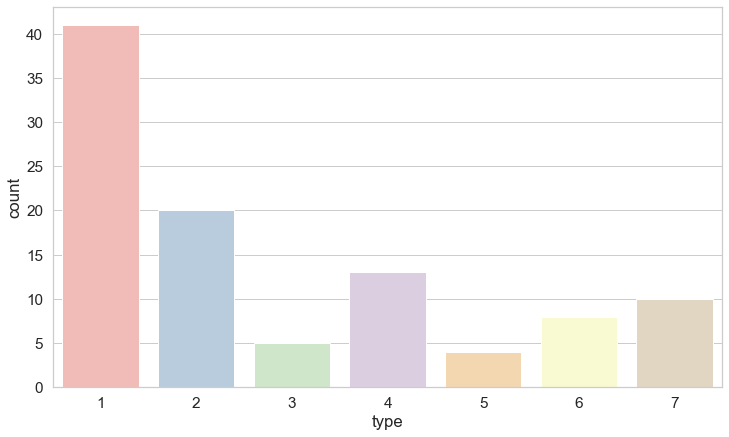

In [13]:
sns.set(style = 'whitegrid', font_scale = 1.4)
plt.subplots(figsize = (12,7))
sns.countplot(x = 'type', data = ZOO, palette = 'Pastel1')

In [14]:
# By looking at the above we can see that it seems to be an imbalance data set.
# Like Type 1 is much Higher than Type 2

In [16]:
Y = ZOO['type']
Y.head()

0    1
1    1
2    4
3    1
4    1
Name: type, dtype: int64

In [19]:
X = ZOO.drop('type',axis=1)

In [21]:
X = ZOO.drop('animal name',axis=1)
X.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,...,tail,domestic,catsize,type,legs_0,legs_2,legs_4,legs_5,legs_6,legs_8
0,1,0,0,1,0,0,1,1,1,1,...,0,0,1,1,0,0,1,0,0,0
1,1,0,0,1,0,0,0,1,1,1,...,1,0,1,1,0,0,1,0,0,0
2,0,0,1,0,0,1,1,1,1,0,...,1,0,0,4,1,0,0,0,0,0
3,1,0,0,1,0,0,1,1,1,1,...,0,0,1,1,0,0,1,0,0,0
4,1,0,0,1,0,0,1,1,1,1,...,1,0,1,1,0,0,1,0,0,0


In [23]:
X = X.drop('type',axis=1)

KeyError: "['type'] not found in axis"

In [25]:
X.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,...,fins,tail,domestic,catsize,legs_0,legs_2,legs_4,legs_5,legs_6,legs_8
0,1,0,0,1,0,0,1,1,1,1,...,0,0,0,1,0,0,1,0,0,0
1,1,0,0,1,0,0,0,1,1,1,...,0,1,0,1,0,0,1,0,0,0
2,0,0,1,0,0,1,1,1,1,0,...,1,1,0,0,1,0,0,0,0,0
3,1,0,0,1,0,0,1,1,1,1,...,0,0,0,1,0,0,1,0,0,0
4,1,0,0,1,0,0,1,1,1,1,...,0,1,0,1,0,0,1,0,0,0


In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .2, random_state = 30, stratify = Y)

X_train.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,...,fins,tail,domestic,catsize,legs_0,legs_2,legs_4,legs_5,legs_6,legs_8
20,0,1,1,0,1,0,0,0,1,1,...,0,1,1,0,0,1,0,0,0,0
64,1,0,0,1,0,0,1,1,1,1,...,0,1,0,1,0,0,1,0,0,0
90,0,0,1,0,0,0,0,0,1,1,...,0,1,0,1,0,0,1,0,0,0
59,0,1,1,0,1,0,0,0,1,1,...,0,1,0,0,0,1,0,0,0,0
30,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [31]:
X_test.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,...,fins,tail,domestic,catsize,legs_0,legs_2,legs_4,legs_5,legs_6,legs_8
46,0,0,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
79,0,1,1,0,1,1,1,0,1,1,...,0,1,0,0,0,1,0,0,0,0
23,0,1,1,0,1,0,0,0,1,1,...,0,1,0,1,0,1,0,0,0,0
60,0,0,1,0,0,1,1,1,1,0,...,1,1,0,1,1,0,0,0,0,0
97,1,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [33]:
Y_train.head()

20    2
64    1
90    3
59    2
30    6
Name: type, dtype: int64

In [34]:
Y_test.head()

46    7
79    2
23    2
60    4
97    6
Name: type, dtype: int64

In [36]:
# Applying Grid-Search
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)
param_grid

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39])}

In [38]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid,cv=10)
grid.fit(X_train, Y_train)
print(grid.best_params_)

C:\Users\siddh\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


{'n_neighbors': 1}


In [39]:
# In the above we got K = 1 so it will be used in KNN Classifier Algorithm

C:\Users\siddh\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\siddh\anaconda3\lib\site-packag

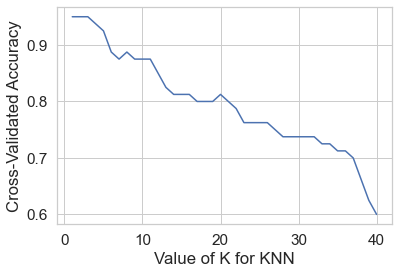

In [41]:
# CROSS-VALIDATION Accuracy
# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, Y_train, cv=10)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [42]:
# As per above, we can see that Increase in value of "K" leading to decrease in accuracy

In [44]:
#Prediction using classifier
model = KNeighborsClassifier(n_neighbors =1).fit(X_train,Y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test,y_pred)
print(accuracy)

0.9523809523809523


In [46]:
confusion_matrix = confusion_matrix(Y_test,y_pred)
print (confusion_matrix)

TypeError: 'numpy.ndarray' object is not callable

In [47]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         4
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         3
           5       0.50      1.00      0.67         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           0.95        21
   macro avg       0.79      0.86      0.81        21
weighted avg       0.93      0.95      0.94        21



C:\Users\siddh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\siddh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [50]:
# We can see that for TYPE 5- precision, & F1 Score is less.
# As the data is an imbalanced one, so the precision values are getting affected.
# Oversampling will be the best technique for this.

In [51]:
#Random Over-Sampling
ROS = RandomOverSampler(random_state = 30)

In [53]:
x_resample, y_resample = ROS.fit_resample(X, Y)
y_df = pd.DataFrame(y_resample)

In [55]:
y_df.value_counts()

type
7       41
6       41
5       41
4       41
3       41
2       41
1       41
dtype: int64

In [56]:
# The above data has successfully been resampled
# All the values for the respective type is 41.

In [60]:
# Training and Test Model for the Resampled Data
X_train, X_test, Y_train, Y_test = train_test_split(x_resample, y_resample, test_size = .2, random_state = 30, stratify = y_resample)

In [62]:
# Grid Search

n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid,cv=10)
grid.fit(X_train, Y_train)
print(grid.best_params_)

{'n_neighbors': 1}


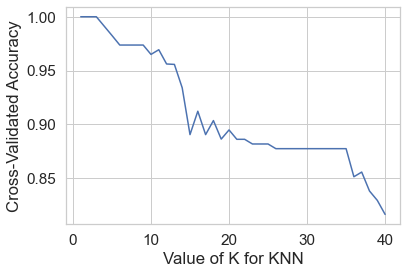

In [64]:
#CV w.r.t. K-Values
# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, Y_train, cv=10)
    k_scores.append(scores.mean())

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [66]:
# Using K=1
model = KNeighborsClassifier(n_neighbors =1).fit(X_train,Y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test,y_pred)
print(accuracy)

1.0


In [67]:
# It shows that the accuracy is 100%.
# We'll go for Confusion Matrix to confirm.

In [70]:
# Confusion Matrix.
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test,y_pred)
print (confusion_matrix)

[[8 0 0 0 0 0 0]
 [0 8 0 0 0 0 0]
 [0 0 8 0 0 0 0]
 [0 0 0 8 0 0 0]
 [0 0 0 0 8 0 0]
 [0 0 0 0 0 9 0]
 [0 0 0 0 0 0 9]]


In [72]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         8
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00         9

    accuracy                           1.00        58
   macro avg       1.00      1.00      1.00        58
weighted avg       1.00      1.00      1.00        58



In [ ]:
# From the above we can see that the orecision, F1-score and recall is 1 and is same for all.
